<a href="https://colab.research.google.com/github/TonyLiu836/CSCI5525-MachineLearning/blob/main/CSCI5525HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSCI5525 HW 1
Tony Liu - ID: 5383942

In [2]:
from google.colab import drive
drive.mount('drive')


Mounted at drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
import math


boston_data_path = "/content/drive/MyDrive/Grad School/Spring2022/CSCI5525 ML/HW1/boston.csv"       #change path for boston data   


In [4]:

def getBostonDataset(tau):
    boston = np.loadtxt(open(boston_data_path, "rb"), delimiter=",", skiprows=1)
    boston = np.asarray(boston)
    #X = boston[:,:-1]
    y = boston[:,-1:]

    boundary_value = np.percentile(y, tau)

    for i in range(len(y)):
        if y[i] >= boundary_value:
            boston[i][-1] = 1
        else:
            boston[i][-1] = 0
    #return X, y
    return boston

def getDigitsDataset():
    digits = np.loadtxt(open("/content/drive/MyDrive/Grad School/Spring2022/CSCI5525 ML/HW1/digits.csv"), delimiter=",", skiprows=1)
    #data = datasets.load_digits()
    return digits


def chooseDataset(dataset):
    if dataset == "Boston50":
        boston50 = getBostonDataset(50)
        return boston50

    elif dataset == "Boston75":
        boston75= getBostonDataset(75)
        return boston75

    else:
        digits = getDigitsDataset()
        return digits



# LDA1dThres

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Fold=  0   Train error=  12.666666666666668 %  Train std dev=  2.411085509336678   Test Error 12.0 %  Test std dev=  7.183313998427191
Fold=  1   Train error=  26.0 %  Train std dev=  2.437340969452519   Test Error 32.0 %  Test std dev=  7.0710678118654755
Fold=  2   Train error=  21.777777777777775 %  Train std dev=  2.454524670486063   Test Error 20.0 %  Test std dev=  7.424284477308231
Fold=  3   Train error=  33.77777777777778 %  Train std dev=  2.3873466167091757   Test Error 42.0 %  Test std dev=  7.071067811865472
Fold=  4   Train error=  15.11111111111111 %  Train std dev=  2.431616170707479   Test Error 8.0 %  Test std dev=  6.957010852370436
Fold=  5   Train error=  14.000000000000002 %  Train std dev=  2.4133374258201385   Test Error 18.0 %  Test std dev=  7.429670248402682
Fold=  6   Train error=  6.0 %  Train std dev=  2.373562665204263   Test Error 10.0 %  Test std dev=  7.2055534138607245
Fold=  7   Train error=  27.77777777777778 %  Train std dev=  2.348837379862006   T

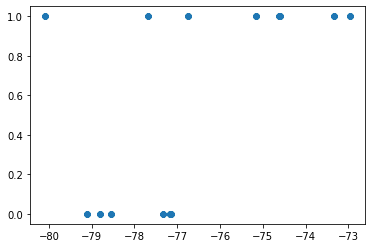

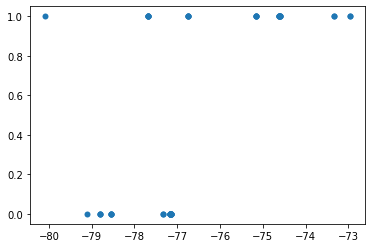

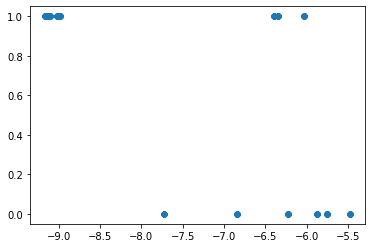

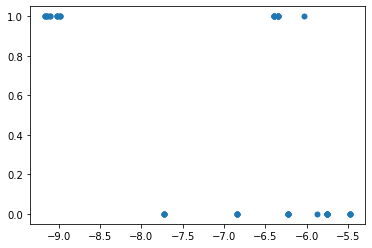

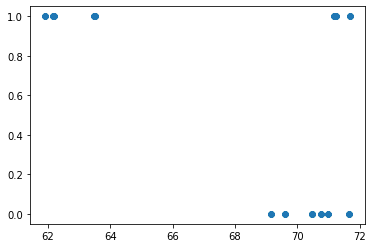

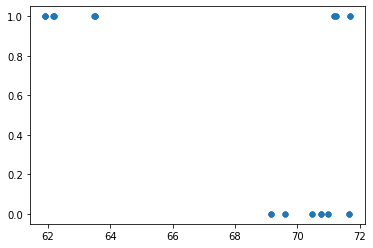

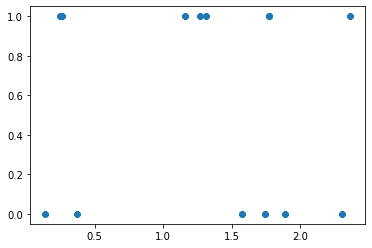

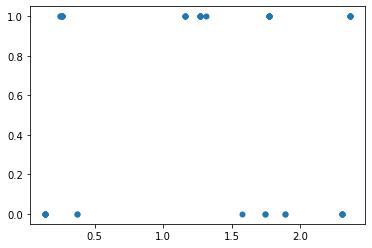

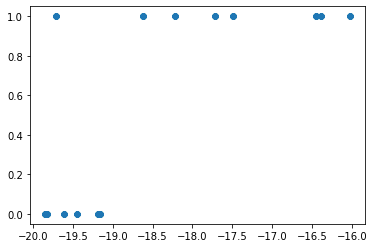

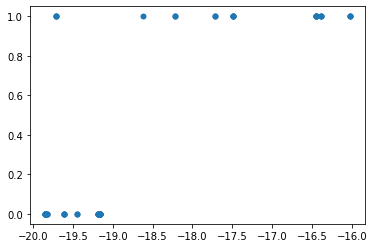

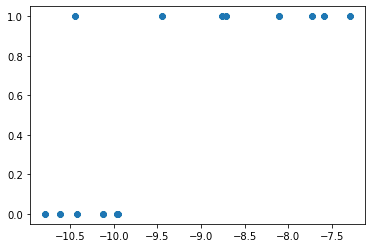

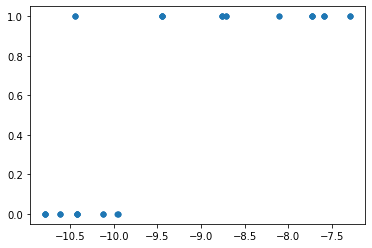

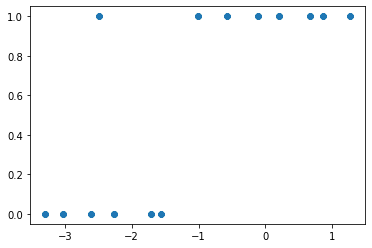

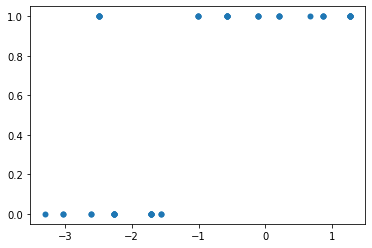

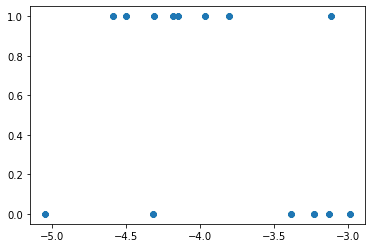

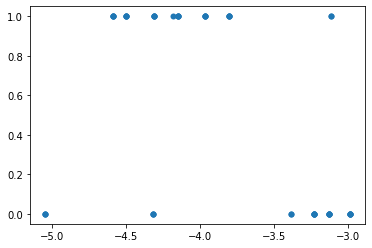

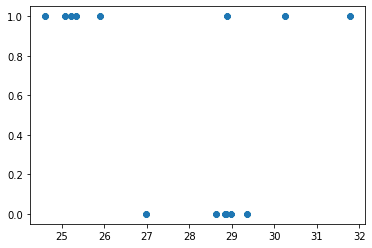

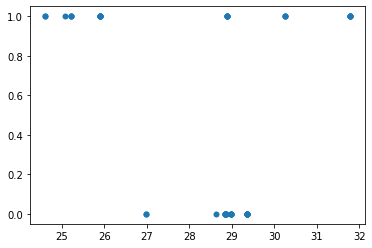

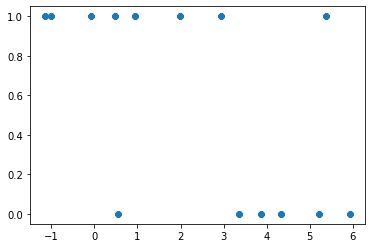

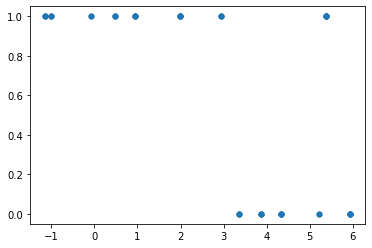

In [71]:
from random import randrange

#split data into 10-folds
def crossValSplit(dataset, folds = 10):
    fold_size = int(len(dataset) / folds)
    split_dataset = []
    dataset_copy = dataset
    for i in range(folds):
        each_fold = []
        while len(each_fold) < fold_size:
            randSample = randrange(len(dataset_copy[0]))

            each_fold.append(dataset_copy[randSample])
            np.delete(dataset_copy,randSample)
        split_dataset.append(each_fold)
    
    return split_dataset 

#seperate samples into classes based on their labels
def seperateData(data, labels):
    class1 = []       #y=1 class
    class0 = []       #y=0 class
    for i in range(np.shape(data)[0]):

        if labels[i] == 1:
            class1.append(data[i])
        else:
            class0.append(data[i])
    return class0, class1

def calcMeans(class0, class1):
    #print(np.shape(class0))
    class1Mean = np.mean(class1, axis = 0)      #mean of features in each class
    class0Mean = np.mean(class0, axis = 0)      
    return class0Mean, class1Mean

#finds the between-class scatter and within-class scatter 
def calcCovariances(class0, class1, class0Mean, class1Mean):
    diffMeans = np.asarray(class1Mean - class0Mean)
    SB = np.matmul(np.transpose([diffMeans]), [diffMeans])
    length = len(class0[0])
    sum0 = 0
    sum1 = 0
    for n in range(len(class0Mean)):
        temp0 = class0[n] - class0Mean
        sum0 += np.matmul(np.transpose([temp0]), [temp0])

    for n in range(len(class1Mean)):  
        temp1 = class1[n] - class1Mean
        sum1 += np.matmul(np.transpose([temp1]), [temp1])

    SW = sum0 + sum1

    return SB, SW


# projects samples by multiplying W.T and each sample 
def projectPoints(W, data):
    #projectedPts = []
    #print(np.shape(data))
    #print(np.shape([W]))
    projectedPts = data @ np.transpose(W)

    return projectedPts

# takes in samples of both classes and then finds the best boundary to classify samples
def calcBoundary(class0, class1):
    class0Mean,class1Mean = calcMeans(class0, class1)
    SB,SW = calcCovariances(class0,class1, class0Mean, class1Mean)
    eigVal, eigVect = np.linalg.eig(np.matmul(np.linalg.pinv(SW),SB))
    largestEigValInd = np.where(eigVal == max(eigVal))
    W = eigVect[largestEigValInd][0]

    projPtsC0 = projectPoints(W, class0)
    projPtsC1 = projectPoints(W, class1)
    

    ## need to modify this along with Predict function to use Bayes' 
    projC0Mean, projC1Mean = calcMeans(projPtsC0, projPtsC1)

    mid = np.add(projC0Mean, projC1Mean) / 2

    if projC0Mean < mid:      #class 0 has lower mean 
        return mid, W, 0, 1
    else:
        return mid, W, 1, 0



##### need to change this to use Bayes' 
def predict(data, W, boundary, lowerClass, higherClass, label):
    y_hat = []
    proj = projectPoints(W, data)
    projplot=plot(proj, label)
    for i in range(len(proj)):
        if proj[i] > boundary:
            y_hat.append(higherClass)
        else:
          y_hat.append(lowerClass)
    return y_hat
        #proj = np.matmul( ,data[i])

def errorAndStdDev(prediction, gndTruth):
    counter = 0
    temp = 0
    gndTruthMean = sum(gndTruth) / len(gndTruth)
    for i in range(len(prediction)):
        if prediction[i] != gndTruth[i]:
            counter += 1
    
    error = counter / len(prediction) * 100
    
    mean = np.mean(gndTruth)
    for i in range(len(prediction)):
        temp += (prediction[i] - mean)**2
    #math.sqrt(sumTotal/len(predictions))/math.sqrt(len(t))
    stdDev = np.sqrt(temp/len(gndTruth)) / np.sqrt(len(prediction)) *100 
    return error, stdDev

def LDA1dThres(filename, num_crossval):#, prior):
    split_data = crossValSplit(filename)
    
    globalError = 0
    globalStdDev = 0

    fold_error = []
    fold_stddev = []
    for i in range(len(split_data)):
        #print(len(split_data[i]))
        test_data = np.copy(split_data[i])
        test_labels = test_data[:,-1]
        test_data = test_data[:,:-1]
        #print("test_data", np.shape(test_data))
        #print(split_data[i] - test_data)
        #print("split data", np.shape(split_data))
        train_data_folds = np.delete(np.copy(split_data),i,0)
        folds, samples, features = np.shape(train_data_folds)
        train_data = np.reshape(train_data_folds, (folds * samples, features))
        
        train_labels = train_data[:,-1]
        #print("train_labels", np.shape(train_labels))
        train_data = train_data[:,:-1]
        #train_labels = train_data[:,-1]
        #train_data = train_data[:,:-1]
        #print("train_data= ",np.shape(train_data))
        class0, class1 = seperateData(train_data, train_labels)
        boundary, W, lowerClass, higherClass = calcBoundary(class0, class1)
        trainPred = predict(train_data, W, boundary, lowerClass, higherClass, train_labels)
        trainError, trainStdDev = errorAndStdDev(trainPred, train_labels)

        prediction = predict(test_data, W, boundary, lowerClass, higherClass, test_labels)
        error, stdDev= errorAndStdDev(prediction, test_labels)
        #fold_error.append(error)
        #fold_stddev.append(stdDev)
        globalStdDev += stdDev
        globalError += error
        print("Fold= ", i, "  Train error= ", trainError, "%  Train std dev= ", trainStdDev, "  Test Error", error, "%  Test std dev= ", stdDev)
        #print("Test error for fold, ", i, " = ", error)
        #print("Test standard deviation for fold, ", i, " = ", stdDev)
    
    
    print("Avg Error = ", globalError / num_crossval, "%")
    print("Avg Standard Deviation = ", globalStdDev / num_crossval)

#dataset, prior = chooseDataset("Boston50")
#print("dataset=", dataset)
dataset= chooseDataset("Boston50")
LDA1dThres(dataset, 10)#, prior)


In [ ]:
#
'''
class0Mean,class1Mean = calcMeans(class0, class1)
SB,SW = calcCovariances(class0,class1, class0Mean, class1Mean)
eigVal, eigVect = np.linalg.eig(np.matmul(np.linalg.pinv(SW),SB))
largestEigValInd = np.where(eigVal == max(eigVal))
W = eigVect[largestEigValInd][0]

projPtsC0 = projectPoints(W, class0)
projPtsC1 = projectPoints(W, class1)

projC0Mean, projC1Mean = calcMeans(projPtsC0, projPtsC1)

mid = np.add(projC0Mean, projC1Mean) / 2

if projC0Mean < mid:      #class 0 has lower mean 
    return 
else:
'''
boston50 = chooseDataset("Boston50")
#print(boston50)
split_dataset = crossValSplit(boston50)
print(split_dataset)
#print(len(split_dataset[9]))

# LDA2dGaussGM

In [ ]:
from random import randrange


#split data into 10-folds
def crossValSplit(dataset, folds = 10):
    fold_size = int(len(dataset) / folds)
    split_dataset = []
    dataset_copy = dataset
    for i in range(folds):
        each_fold = []
        while len(each_fold) < fold_size:
            randSample = randrange(len(dataset_copy[0]))
            each_fold.append(dataset_copy[randSample])
            np.delete(dataset_copy,randSample)
        split_dataset.append(each_fold)
    
    return split_dataset 

#seperate samples into classes based on their labels
def seperateData(data, labels):
    data_dict = {0:[],              #use dictionary to store samples of different classes
                1:[],
                2:[],
                3:[],
                4:[],
                5:[],
                6:[],
                7:[],
                8:[],
                9:[]}

    for i in range(len(data)):
        data_dict[labels[i]].append(data[i,:])
    return data_dict

def calcMeans(data_dict):
    class_means = []                       #list of means of features for samples of each class
    for value in data_dict.values():
        mean = np.mean(value, axis = 0)
        class_means.append(mean) 
    temp = sum(class_means)                              #find overall mean 
    overall_mean = (1/len(class_means)) * temp

    return class_means, overall_mean


#finds the between-class scatter and within-class scatter
def calcCovariances(data_dict, class_means, overall_mean):
    num_classes = len(class_means)

    Si = []
    counter1 = 0
    for key, value in data_dict.items():
        for i in range(len(value)):
            diff = value[i] - class_means[key]
            counter1 += np.matmul(np.transpose([diff]), [diff])
        Si.append(counter1)

    SW = sum(Si)                        #within class scatter

    SB = 0                              #between class scatter
    for i in range(num_classes):
        diffMeans = class_means[i] - overall_mean
        SB += len(data_dict[i]) * np.matmul(np.transpose([diffMeans]), [diffMeans])
    
    return SB, SW

# projects samples by multiplying W.T and each sample 
def projectData(W, data):
    projectedData = []
    for i in range(len(data)):
        projectedData.append(data[i] @ np.transpose(W))
    return projectedData


def findGaussParams(train_data, labels ,W):
    means = {}
    covs = {}
    priors = {}

    data_dict = seperateData(train_data, labels)
    samples = len(train_data)
    for key, value in data_dict.items():
        
        projection = projectData(W, value)
        means[key] = np.mean(projection, axis = 0)
        covs[key] = np.cov(projection, rowvar = False)
        priors[key] = len(data_dict[key])/samples
    return means,covs,priors


def Gaussian(u, sigma, sample):
    d = len(sample)
    #smallVals = 1e-15*np.eye(np.shape(sigma)[0])
    #sigma = sigma + smallVals
    temp1 = (2*math.pi)**(d/2) * (np.linalg.det(sigma)**(1/2))
    temp2 = (-1/2) * (sample-u) @ np.linalg.inv(sigma) @ np.transpose([sample-u])
    gauss = (1/temp1) * np.exp(temp2)
    return gauss


# takes in samples of both classes and then finds the best boundary to classify samples
def train(train_data, labels, test_data):

    data_dict = seperateData(train_data, labels)
    class_means, overall_mean = calcMeans(data_dict)
    SB,SW = calcCovariances(data_dict, class_means, overall_mean)
    eigVal, eigVect = np.linalg.eig(np.matmul(np.linalg.pinv(SW), SB))

    idx = eigVal.argsort()[::-1]
    k=2
    idx = eigVal.argsort()[-k:][::-1]
    W = eigVect[idx]
   
    u, sigma, priors = findGaussParams(train_data, labels, W)
    return W,u,sigma,priors 

def predict(data,W,u,sigma,priors):
    y_hat = []
    proj = projectData(W, data)
    for sample in proj:
        probs = []
        for c in range(len(sigma)):        #for each class, find gaussian and multiply w prior
            gauss = Gaussian(u[c], sigma[c], sample)

            prob = priors[c] * gauss
            probs.append(prob)
        
        y_hat.append(probs)
    predictions = np.argmax(y_hat, axis=1)
    
    return predictions

def errorAndStdDev(y_hat, gndTruth):
    counter = 0
    temp = 0
    gndTruthMean = sum(gndTruth) / len(gndTruth)
    for i in range(len(y_hat)):
        if y_hat[i] != gndTruth[i]:
            counter += 1
    
    error = counter / len(y_hat)
    
    for i in range(len(gndTruth)):
        temp +=  (y_hat[i] - gndTruthMean)**2
    stdDev = np.sqrt(temp/len(gndTruth))
    return error, stdDev


def LDA2dGaussGM(filename, num_crossval):
    split_data = crossValSplit(filename)
    
    globalError = 0
    globalStdDev = 0

    fold_error = []
    fold_stddev = []
    for i in range(len(split_data)):
        test_data = np.copy(split_data[i])
        test_data_labels = test_data[:,-1]
        test_data = test_data[:,:-1]
        
        train_data_folds = np.delete(np.copy(split_data),i,0)
        folds, samples, features = np.shape(train_data_folds)
        train_data = np.reshape(train_data_folds, (folds * samples, features))
        train_data_labels = train_data[:,-1]
        train_data = train_data[:,:-1]
        
        W,u,sigma,priors = train(train_data, train_data_labels, test_data)
        
        trainPred = predict(train_data,W,u,sigma,priors)
        trainError, trainStdDev = errorAndStdDev(trainPred, train_data_labels)
        
        testPred = predict(test_data, W, u, sigma, priors)
        testError, testStdDev = errorAndStdDev(testPred,test_data_labels)

        print("Fold= ", i, "  Train error= ", trainError * 100, "%  Train std dev= ", trainStdDev, "  Test Error", testError * 100, "%   Test std dev= ", testStdDev)
        globalError += trainError 
        globalStdDev += trainStdDev
    
    print("Avg Error = ", globalError / num_crossval * 100, "%")
    print("Avg Standard Deviation = ", globalStdDev / num_crossval)

dataset = chooseDataset("digits")
LDA2dGaussGM(dataset, 10)

Fold=  0   Train error=  49.534450651769085 %  Train std dev=  [3.0674529]   Test Error 53.63128491620112 %   Test std dev=  [3.05378684]
Fold=  1   Train error=  59.40409683426443 %  Train std dev=  [2.86782429]   Test Error 67.0391061452514 %   Test std dev=  [2.8089061]
Fold=  2   Train error=  63.00434512725015 %  Train std dev=  [2.70585035]   Test Error 63.128491620111724 %   Test std dev=  [2.71245016]
Fold=  3   Train error=  52.6381129733085 %  Train std dev=  [2.98181592]   Test Error 45.81005586592179 %   Test std dev=  [2.94029941]
Fold=  4   Train error=  51.21042830540037 %  Train std dev=  [2.85189139]   Test Error 50.27932960893855 %   Test std dev=  [2.81863369]
Fold=  5   Train error=  35.071384233395406 %  Train std dev=  [2.93270766]   Test Error 39.10614525139665 %   Test std dev=  [2.93533822]
Fold=  6   Train error=  65.67349472377406 %  Train std dev=  [2.85706829]   Test Error 68.71508379888269 %   Test std dev=  [2.86044976]
Fold=  7   Train error=  71.1359404

# LDA2dGaussianGM(New) 100% accuracy

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Fold=  0   Train error=  0.0 %  Train std dev=  2.836479497069629   Test Error 0.0 %   Test std dev=  2.7641609033897323
Fold=  1   Train error=  0.0 %  Train std dev=  2.834805176272319   Test Error 0.0 %   Test std dev=  2.7443647201674395
Fold=  2   Train error=  0.0 %  Train std dev=  2.829983773626766   Test Error 0.0 %   Test std dev=  2.816850410389596
Fold=  3   Train error=  0.0 %  Train std dev=  2.82952680962332   Test Error 0.0 %   Test std dev=  2.8178363360349077
Fold=  4   Train error=  0.0 %  Train std dev=  2.848234953965054   Test Error 0.0 %   Test std dev=  2.652825517183228
Fold=  5   Train error=  0.0 %  Train std dev=  2.8246853484810117   Test Error 0.0 %   Test std dev=  2.8647072905540742
Fold=  6   Train error=  0.0 %  Train std dev=  2.8304474703628633   Test Error 0.0 %   Test std dev=  2.8193533230181935
Fold=  7   Train error=  0.0 %  Train std dev=  2.8172292851702787   Test Error 0.0 %   Test std dev=  2.9275555404683202
Fold=  8   Train error=  0.0 %  

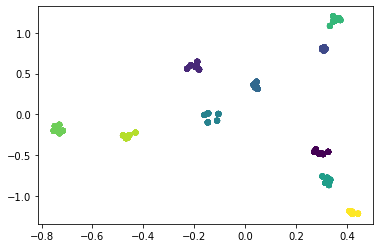

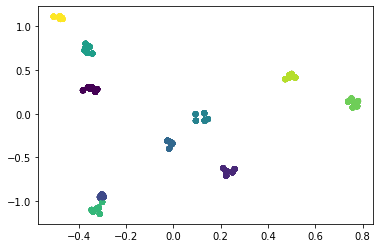

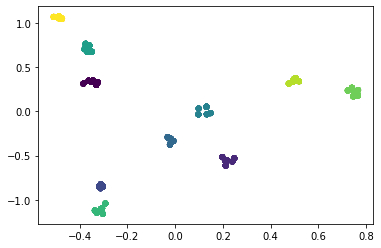

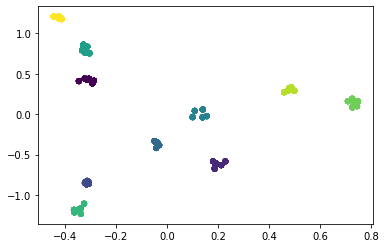

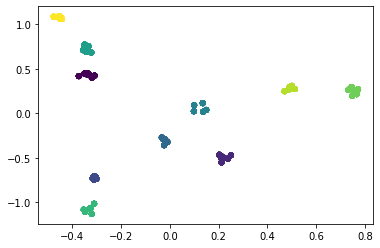

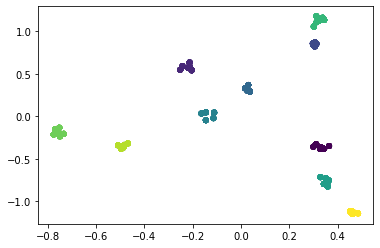

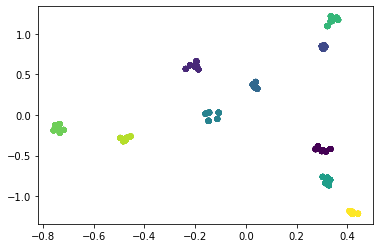

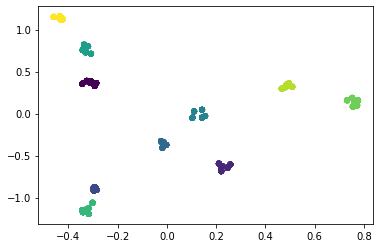

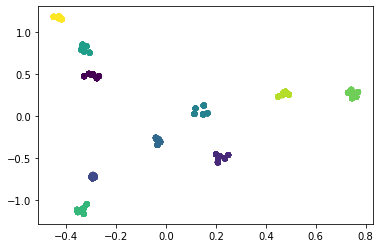

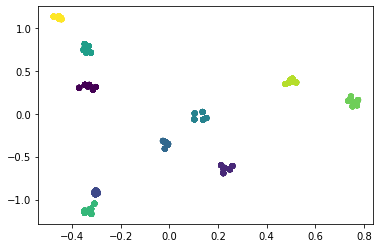

In [61]:
from random import randrange
from collections import defaultdict
import matplotlib.pyplot as plt
#split data into 10-folds
def crossValSplit(dataset, folds = 10):
    fold_size = int(len(dataset) / folds)
    split_dataset = []
    dataset_copy = dataset
    for i in range(folds):
        each_fold = []
        while len(each_fold) < fold_size:
            randSample = randrange(len(dataset_copy[0]))
            each_fold.append(dataset_copy[randSample])
            np.delete(dataset_copy,randSample)
        split_dataset.append(each_fold)
    
    return split_dataset
    
def errorAndStdDev(y_hat, gndTruth):
    counter = 0
    temp = 0
    gndTruthMean = sum(gndTruth) / len(gndTruth)
    for i in range(len(y_hat)):
        #print(y_hat[i], "  ", gndTruth[i])
        if y_hat[i] != gndTruth[i]:
            counter += 1
    
    error = counter / len(y_hat)
    
    for i in range(len(gndTruth)):
        temp +=  (y_hat[i] - gndTruthMean)**2
    stdDev = np.sqrt(temp/len(gndTruth))
    return error, stdDev


#seperate samples into classes based on their labels
def seperateData(data, labels):
    data_dict = {0:[],              #use dictionary to store samples of different classes
                1:[],
                2:[],
                3:[],
                4:[],
                5:[],
                6:[],
                7:[],
                8:[],
                9:[]}

    for i in range(len(data)):
        data_dict[labels[i]].append(data[i,:])
    return data_dict

def calcMeans(data_dict):
    class_means = []                       #list of means of features for samples of each class
    for value in data_dict.values():
        mean = np.mean(value, axis = 0)
        class_means.append(mean) 
    temp = sum(class_means)                              #find overall mean 
    overall_mean = (1/len(class_means)) * temp

    return class_means, overall_mean


#finds the between-class scatter and within-class scatter
def calcCovariances(data_dict, class_means, overall_mean):
    num_classes = len(class_means)
    Si = []
    counter1 = 0

    for key, value in data_dict.items():
        for i in range(len(value)):
            diff = value[i] - class_means[key]
            counter1 += np.matmul(np.transpose([diff]), [diff])
        Si.append(counter1)

    SW = sum(Si)                        #within class scatter

    SB = 0                              #between class scatter
    for i in range(num_classes):
        diffMeans = class_means[i] - overall_mean
        SB += len(data_dict[i]) * np.matmul(np.transpose([diffMeans]), [diffMeans])
    
    return SB, SW

def oneHot(labels):
    num_classes = len(set(labels))
    onehot_labels = np.zeros((len(labels), num_classes))
    #print(onehot_labels[1][2])
    for i in range(len(labels)):          #encodes labels to 1-hot 
        #print(i, labels[i])
        
        onehot_labels[i][int(labels[i])-1] = 1

    return onehot_labels

# projects samples by multiplying W.T and each sample
def projectData(W, data):
    #print(np.shape(W))
    #print(np.shape(data))
    projectedData = []
    for i in range(len(data)):
        #projectedData.append(data[i] @ np.transpose(W))
        projectedData.append(data[i] @ W)
    return projectedData


def findGaussParams(data_dict, labels, W):
    means = []
    covs = []
    priors = []
    total_cov = 0

    #data_dict = seperateData(train_data, labels)
    samples = len(labels)
    for key, value in data_dict.items():
        projection = projectData(W, value)
        means.append(np.mean(projection, axis = 0))
        cov = np.cov(projection, rowvar = False)      #2x2
        #print(np.shape(cov), len(data_dict[key]), samples)
        covs.append(cov)

        prior = len(data_dict[key])/samples
        total_cov += prior * cov
        
        priors.append(prior)
        
    return means,covs,priors, total_cov


def softmaxnew(x):
    # implement the softmax activation function for output layer
    f_x = np.exp(x) / np.sum(np.exp(x), keepdims=True)
    return f_x

def softmax(vect):
    e = np.exp(vect)
    return e / e.sum()


def plot(projdata, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(projdata[:,0],projdata[:,1] , c=labels, lw=0)

def train(train_data, labels, test_data):
    num_classes = len(set(labels))
    data_dict = seperateData(train_data, labels)
    labels_onehot = oneHot(labels)

    class_means, overall_mean = calcMeans(data_dict)
    SB,SW = calcCovariances(data_dict, class_means, overall_mean)   
    
    eigVal, eigVect = np.linalg.eig(np.linalg.pinv(SW) @ SB)
    eigPairs = [(abs(eigVal[i]), eigVect[:,i]) for i in range(len(eigVal))]
    sortedEigPairs = sorted(eigPairs, key = lambda x: x[0], reverse = True)
    #W = np.transpose(sortedEigPairs[0:2][1])
    #print(np.shape(W))
    largest = sortedEigPairs[0][1]
    seclargest = sortedEigPairs[1][1]
    #print(np.shape([largest]))
    W = np.transpose(np.vstack((largest,seclargest)))
    #print(np.shape(W))

    proj = projectData(W, train_data)
    proj = np.asarray(proj)
    projplot = plot(proj, labels)
    #u, sigma, priors = findGaussParams(train_data, labels, W)

    proj_class_mean, proj_class_cov, priors, total_cov = findGaussParams(data_dict, labels, W)

    return W, proj_class_mean, proj_class_cov, priors


#this function isnt correct 
def predictOld(data, W, weights1, weights2, weights0):
    y_hat = []
    proj = projectData(W, data)     #each projected sample is a (1x2) vector

    for sample in proj:
        sample_pred = []
        for i in range(len(weights1)):
            
            g = np.transpose([sample]) @ weights1[i] @ sample + np.transpose([weights2[i]]) @ sample + weights0[i]
            sample_pred.append(g)

        pred = softmax(sample_pred)
        y_hat.append(np.argmax(pred))

    return y_hat


def predict(data, W, means, covs, priors):
    y_hat = []
    proj = projectData(W, data)  
    proj = np.asarray(proj)
    for sample in proj:
        sample_pred = []
        for i in range(len(means)):
            invCov = np.linalg.inv(covs[i])
            t1 = (-1/2) * invCov
            t2 = invCov @ means[i]
            t3 = (-1/2) * means[i] @ invCov @ np.transpose([means[i]]) - (1/2)*np.log(np.linalg.det(covs[i])) + np.log(priors[i])
            g = (sample @ t1 @ np.transpose([sample])) + sample @ t2 + t3
            sample_pred.append(g)
        pred = softmax(sample_pred)
        y_hat.append(np.argmax(pred))
    
    return y_hat

def LDA2dGaussGM(filename, num_crossval):
    split_data = crossValSplit(filename)
    
    globalError = 0
    globalStdDev = 0

    fold_error = []
    fold_stddev = []
    for i in range(len(split_data)):
        test_data = np.copy(split_data[i])
        test_labels = test_data[:,-1]
        test_data = test_data[:,:-1]
        
        train_data_folds = np.delete(np.copy(split_data),i,0)
        folds, samples, features = np.shape(train_data_folds)
        train_data = np.reshape(train_data_folds, (folds * samples, features))
        train_labels = train_data[:,-1]
        train_data = train_data[:,:-1]

        W, means, covs, priors = train(train_data, train_labels, test_data)
        
        trainPred = predict(train_data, train_labels, W, means, covs, priors)
        trainError, trainStdDev = errorAndStdDev(trainPred, train_labels)
        
        testPred = predict(test_data, test_labels, W, means, covs, priors)
        testError, testStdDev = errorAndStdDev(testPred, test_labels)

        print("Fold= ", i, "  Train error= ", trainError * 100, "%  Train std dev= ", trainStdDev, "  Test Error", testError * 100, "%   Test std dev= ", testStdDev)
        globalError += trainError 
        globalStdDev += trainStdDev
    
    print("Avg Error = ", globalError / num_crossval * 100, "%")
    print("Avg Standard Deviation = ", globalStdDev / num_crossval)

dataset = chooseDataset("digits")
LDA2dGaussGM(dataset, 10)

# logisticRegression 

In [91]:
import random
from random import randrange
from collections import defaultdict

#split data into 10-folds
def crossValSplit(dataset, folds = 10):
    fold_size = int(len(dataset) / folds)
    split_dataset = []
    dataset_copy = dataset
    for i in range(folds):
        each_fold = []
        while len(each_fold) < fold_size:
            #print("here")
            randSample = randrange(len(dataset_copy[0]))
            each_fold.append(dataset_copy[randSample])
            np.delete(dataset_copy,randSample)
        split_dataset.append(each_fold)
    
    return split_dataset 

def errorAndStdDev(y_hat, gndTruth):
    counter = 0
    temp = 0
    gndTruthMean = sum(gndTruth) / len(gndTruth)
    #print("yhat len",len(y_hat))
    #print("gnd len",len(gndTruth))
    for i in range(len(y_hat)):
        if y_hat[i] != gndTruth[i]:
            counter += 1
    
    error = counter / len(y_hat)
    
    for i in range(len(gndTruth)):
        temp +=  (y_hat[i] - gndTruthMean)**2
    stdDev = np.sqrt(temp/len(gndTruth))
    return error, stdDev

def oneHot(labels):
    num_classes = len(set(labels))
    onehot_labels = np.zeros((len(labels),num_classes))

    for i in range(len(labels)):          #encodes labels to 1-hot 
        onehot_labels[i][labels[i]] = 1

    return onehot_labels

#seperate samples into classes based on their labels
def seperateData(data, labels):

    data_combined = [(labels[i], data[i]) for i in range(len(labels))]
    data_dict = defaultdict(list)

    for key, val in data_combined:        #seperates data based on class
        data_dict[key].append(val)

    return data_dict


def sigmoid(z):
    ans = 1/(1 + np.exp(-z)) 
    return ans


def loss(train_labels,y_hat):
    loss = 0
    cost_y0 = (1 - train_labels) * np.log(1 - y_hat)
    cost_y1 = -1 * train_labels * np.log(y_hat)

    #J = (1.0/m) * np.sum(cost_y_0 - cost_y_1) + (reg_lambda/(2.0 * m)) * np.sum(np.power(theta[1:], 2))
    loss = (1/len(y_hat)) * np.sum(cost_y0-cost_y1)

    return loss

def classifyBinary(data, W):
    final_pred = np.zeros(len(data))
    #print("data", np.shape(data))
    #print("w", np.shape(W))
    pred = data @ W

    for i in range(len(pred)):
        if pred[i] >= 0.5:
            final_pred[i] = 1

    return final_pred

def trainBinaryLogReg(train_data, train_labels):
    #print("train labels", np.shape([train_labels]))
    num_features = np.shape(train_data)[1]
    num_samples = len(train_data)
    W = np.random.normal(0, 1, size=(num_features,1))
    lr = 1
    iters = 1000

    error_history = []
    for i in range(iters):
        
        #print(np.shape(W))
        z =  train_data @ W
        y_hat = sigmoid(z)

        #print("train data transpo", np.shape(np.transpose(train_data)))
        #print("W shape", np.shape(W ))
        #print('y_hat', np.shape(y_hat))
        #print("labels", np.shape(np.transpose([train_labels])))
        gradient = lr * (1/num_samples) * (np.transpose(train_data) @ (y_hat - np.transpose([train_labels])))
        W -= gradient
        error = loss(train_labels, y_hat)
        error_history.append(error)
    
    return W, error_history


def trainMulticlassLogReg(train_data, train_labels):
    pass

def trainTestSplit(data):
    random.shuffle(data)
    train_size = int(0.8 * len(data))
    train_split = np.asarray(data[:train_size])
    test_split = np.asarray(data[train_size:])

    return train_split, test_split

def trainPercent(train_split, percent):
    #print(percent * len(train_split))
    #print(percent)
    random.shuffle(train_split)
    if percent != 100:
        train_size = int(percent * len(train_split))
    else:
        return train_split
    
    train_data = train_split[:train_size]

    return train_data

def logisticRegression(filename, dataset, num_splits, percent):
    split_data = crossValSplit(dataset)
    
    globalError = 0
    globalStdDev = 0

    fold_error = []
    fold_stddev = []
    for i in range(len(split_data)):
        for j in percent:
            #print("j=", j)
            #print(j+1)
            num_samples = len(split_data[i])

            train_split, test_split = trainTestSplit(split_data[i])
            test_labels = test_split[:,-1]
            test_data = test_split[:,:-1]
            #print(np.shape(train_split))
            train_percent = trainPercent(train_split, j)
            train_labels = train_percent[:,-1]
            train_data = train_percent[:,:-1]

            ########## 
            
            if filename == "Boston50" or filename == "Boston75":
                W, cost_history = trainBinaryLogReg(train_data, train_labels)
                #print("reaches here")
                trainPred = classifyBinary(train_data, W)
                trainError, trainStdDev = errorAndStdDev(trainPred, train_labels)
                #print(trainError)
                testPred = classifyBinary(test_data,W)
                testError, testStdDev = errorAndStdDev(testPred, test_labels)
                
                print("percent=", j,"train error=", trainError,"  test error=", testError)
            #trainPred = predict(train_data,W,u,sigma,priors)
            #trainError, trainStdDev = errorAndStdDev(trainPred, train_data_labels)
            

percent = [10,25,50,75,100]
#datasetNames = ["Boston50", "Boston75", "digits"]
datasetNames = ["Boston50"]
for i in datasetNames:
    dataset = chooseDataset("Boston50")
    logisticRegression(i, dataset, 10, percent)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in multiply


train error= 0.1   test error= 0.2
train error= 0.2   test error= 0.4
train error= 0.4   test error= 0.2
train error= 0.3   test error= 0.3
train error= 0.25   test error= 0.2
train error= 0.125   test error= 0.0
train error= 0.1   test error= 0.2
train error= 0.45   test error= 0.4
train error= 0.4   test error= 0.3
train error= 0.125   test error= 0.2
train error= 0.2   test error= 0.3
train error= 0.15   test error= 0.2
train error= 0.2   test error= 0.0
train error= 0.1   test error= 0.3
train error= 0.075   test error= 0.3
train error= 0.0   test error= 0.1
train error= 0.05   test error= 0.1
train error= 0.175   test error= 0.3
train error= 0.15   test error= 0.2
train error= 0.125   test error= 0.0
train error= 0.075   test error= 0.1
train error= 0.15   test error= 0.2
train error= 0.0   test error= 0.4
train error= 0.0   test error= 0.1
train error= 0.0   test error= 0.1
train error= 0.0   test error= 0.3
train error= 0.0   test error= 0.1
train error= 0.1   test error= 0.0
tr